<a href="https://colab.research.google.com/github/swarnavopramanik/Indivision/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Apr 10 16:08:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.0/973.0 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TkEfir5u7HBdncrkQxWs")
project = rf.workspace("swarnavo").project("object-detection-ndian-vehicle")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/object-detection-ndian-vehicle-1'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11l.pt" epochs=100 imgsz=640

100% 49.0M/49.0M [00:00<00:00, 396MB/s]
Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/object-detection-ndian-vehicle-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

In [ ]:
from IPython.display import display, Image


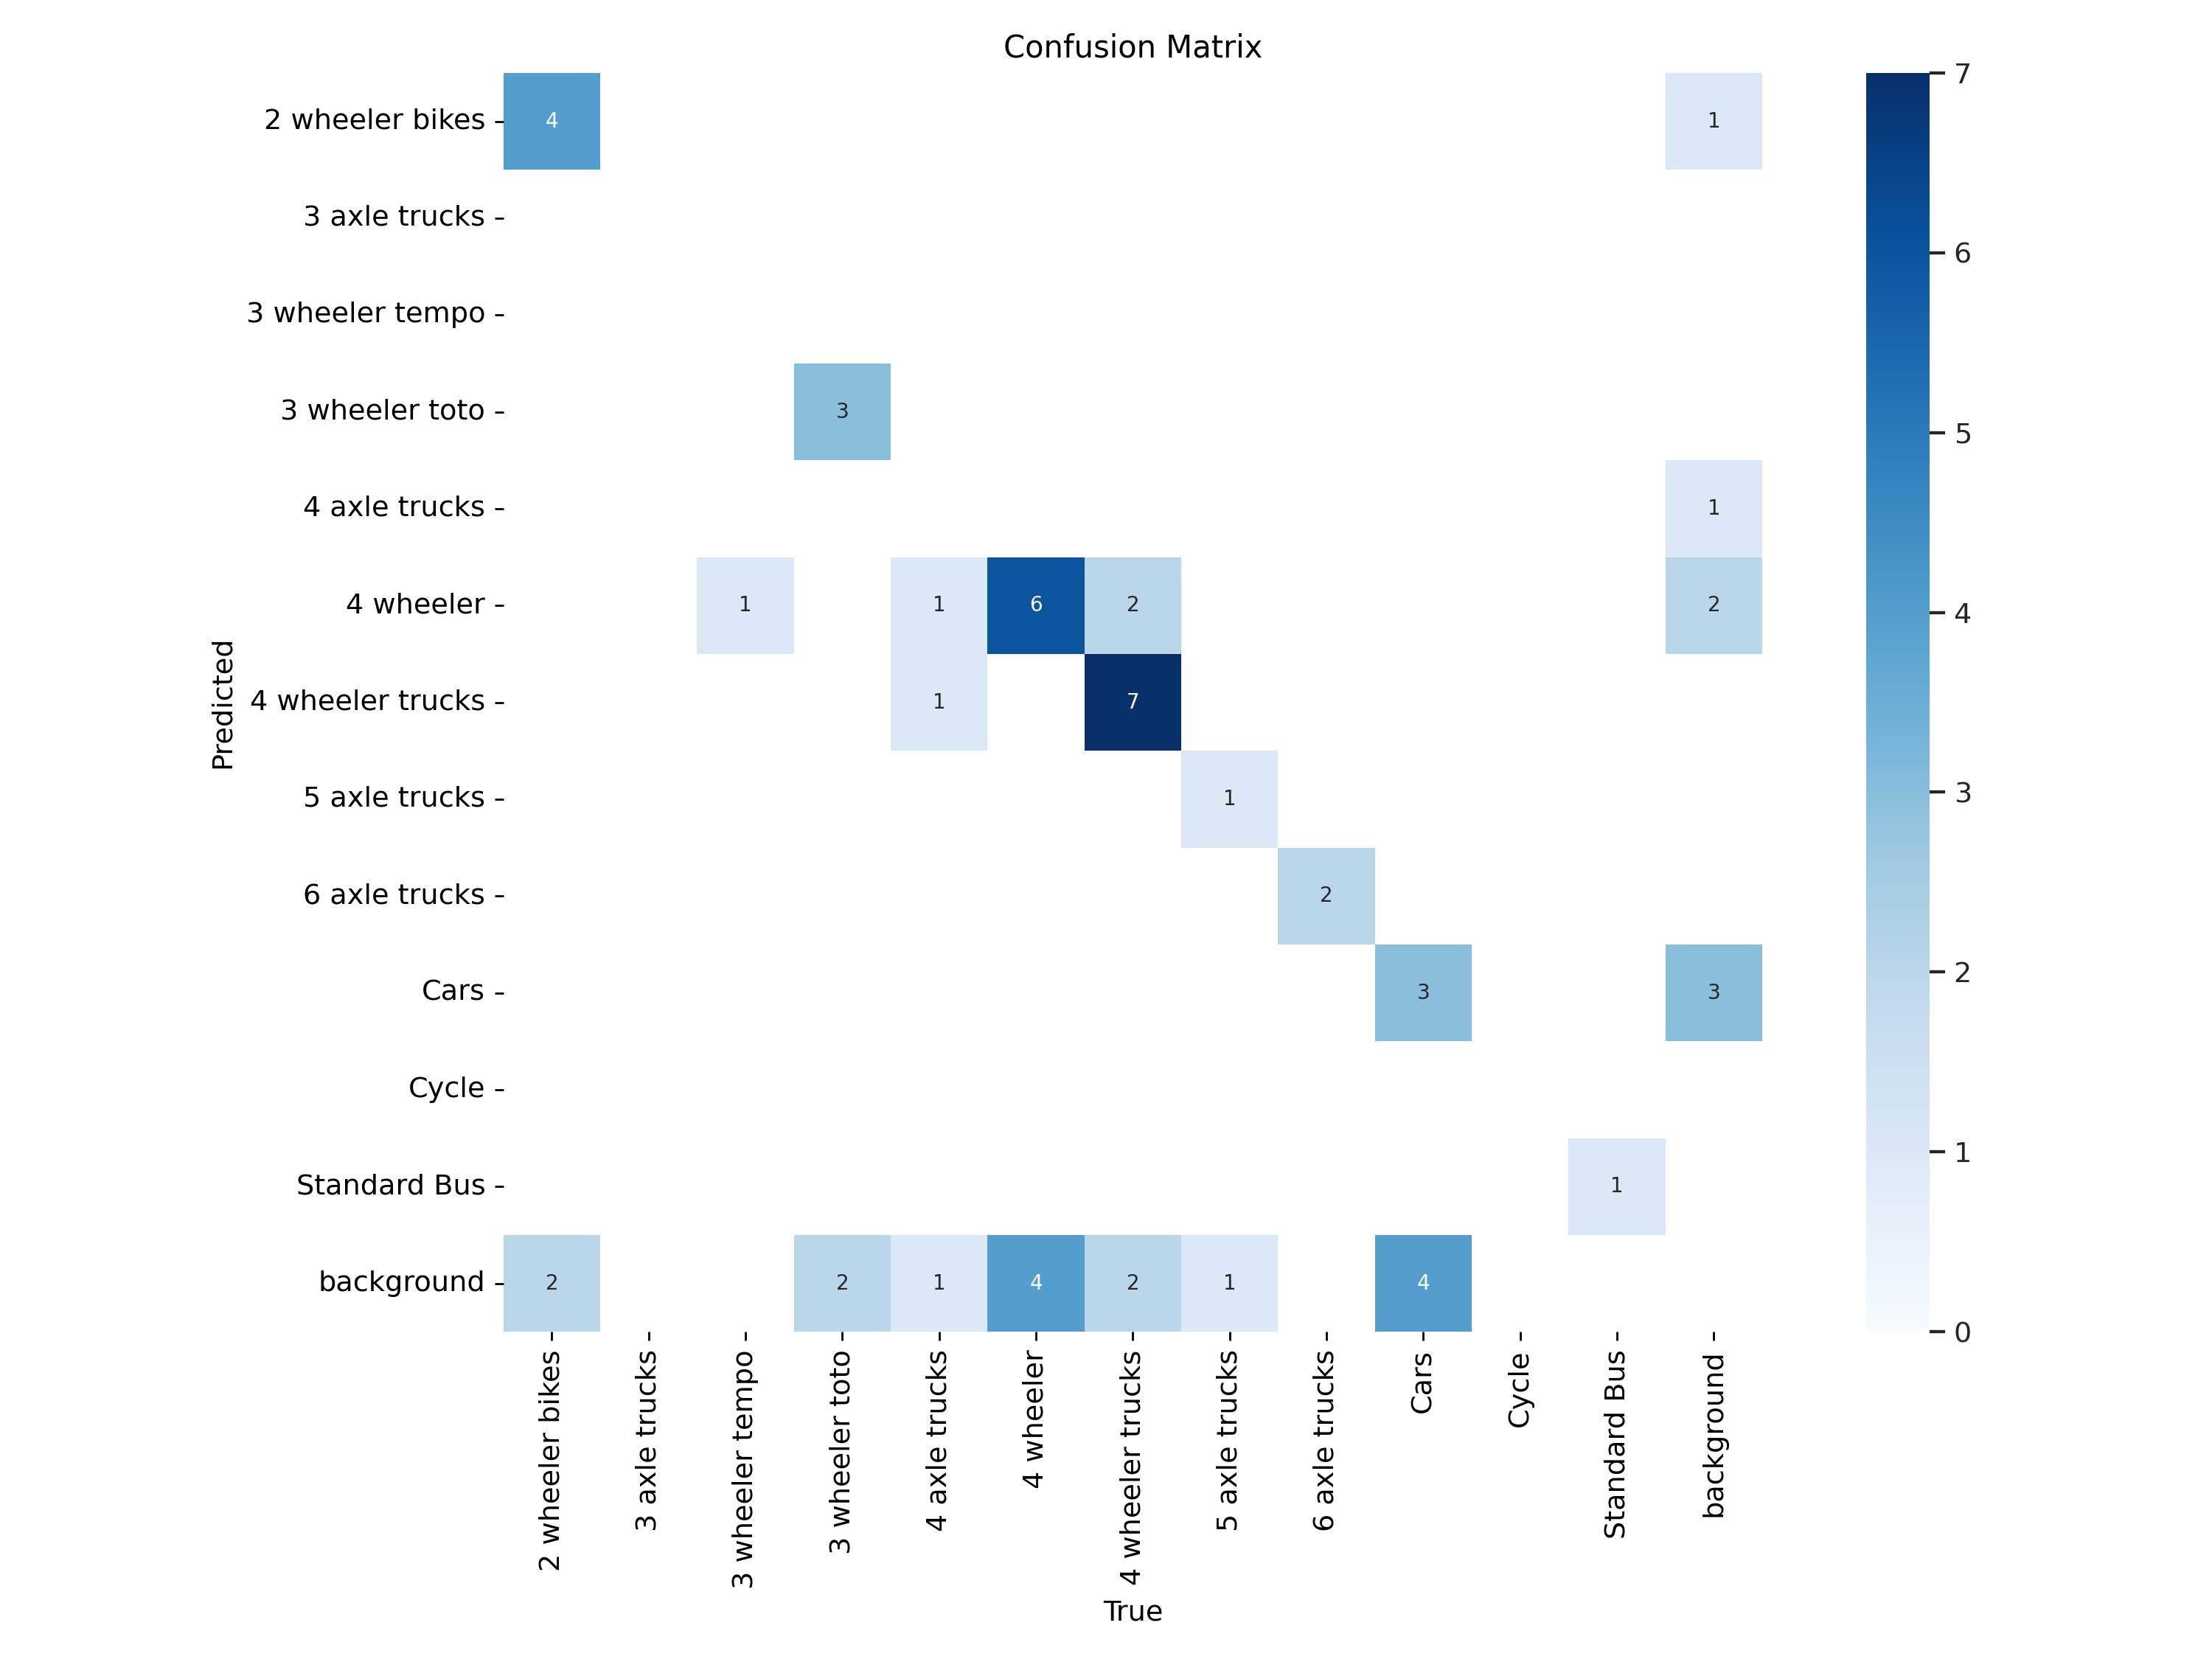

In [ ]:
display(Image("/content/runs/detect/train2/confusion_matrix.png", width=600))

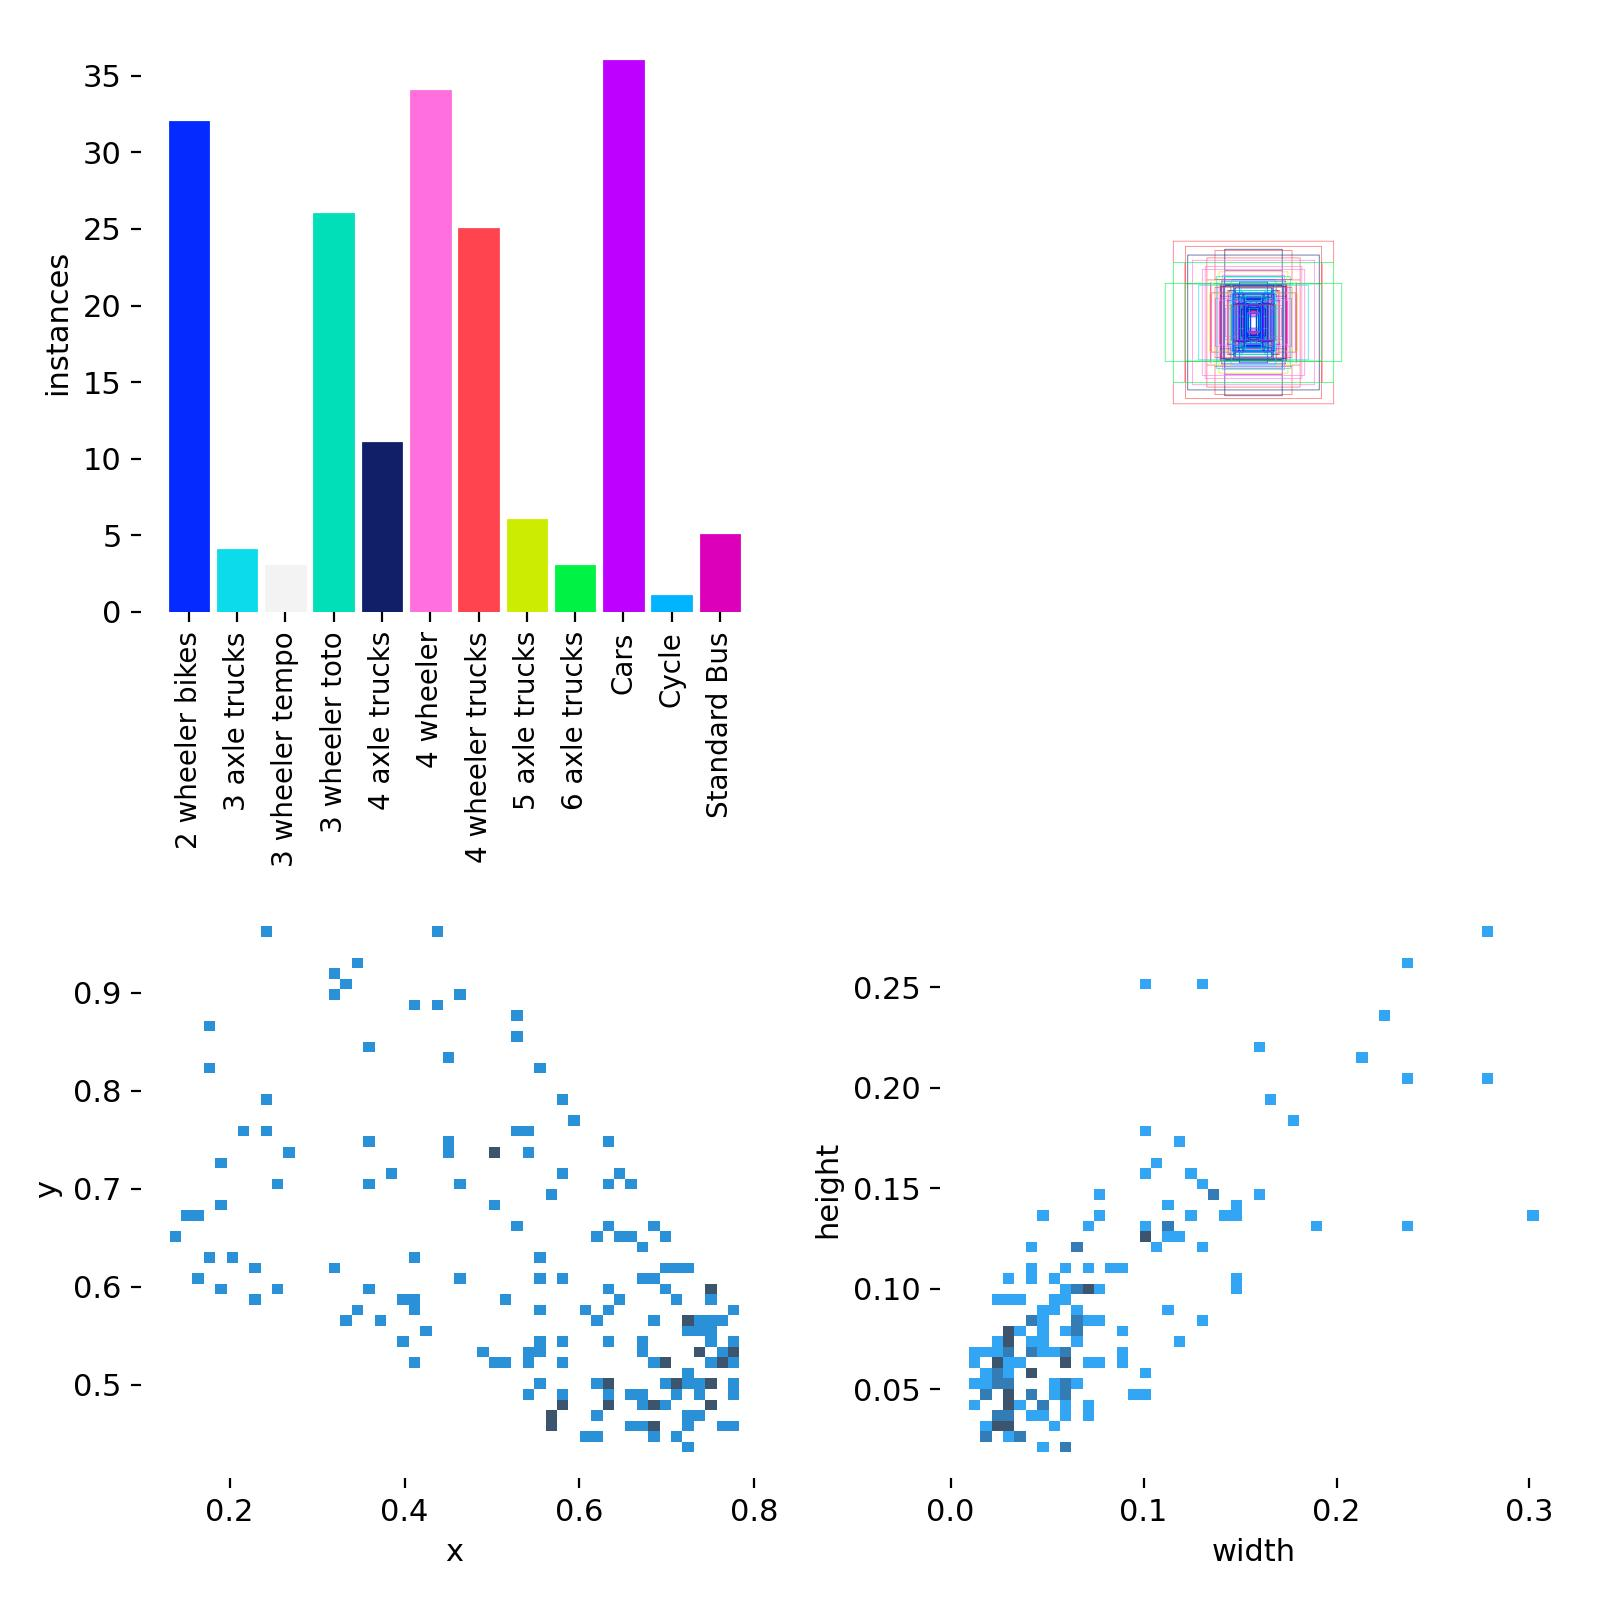

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

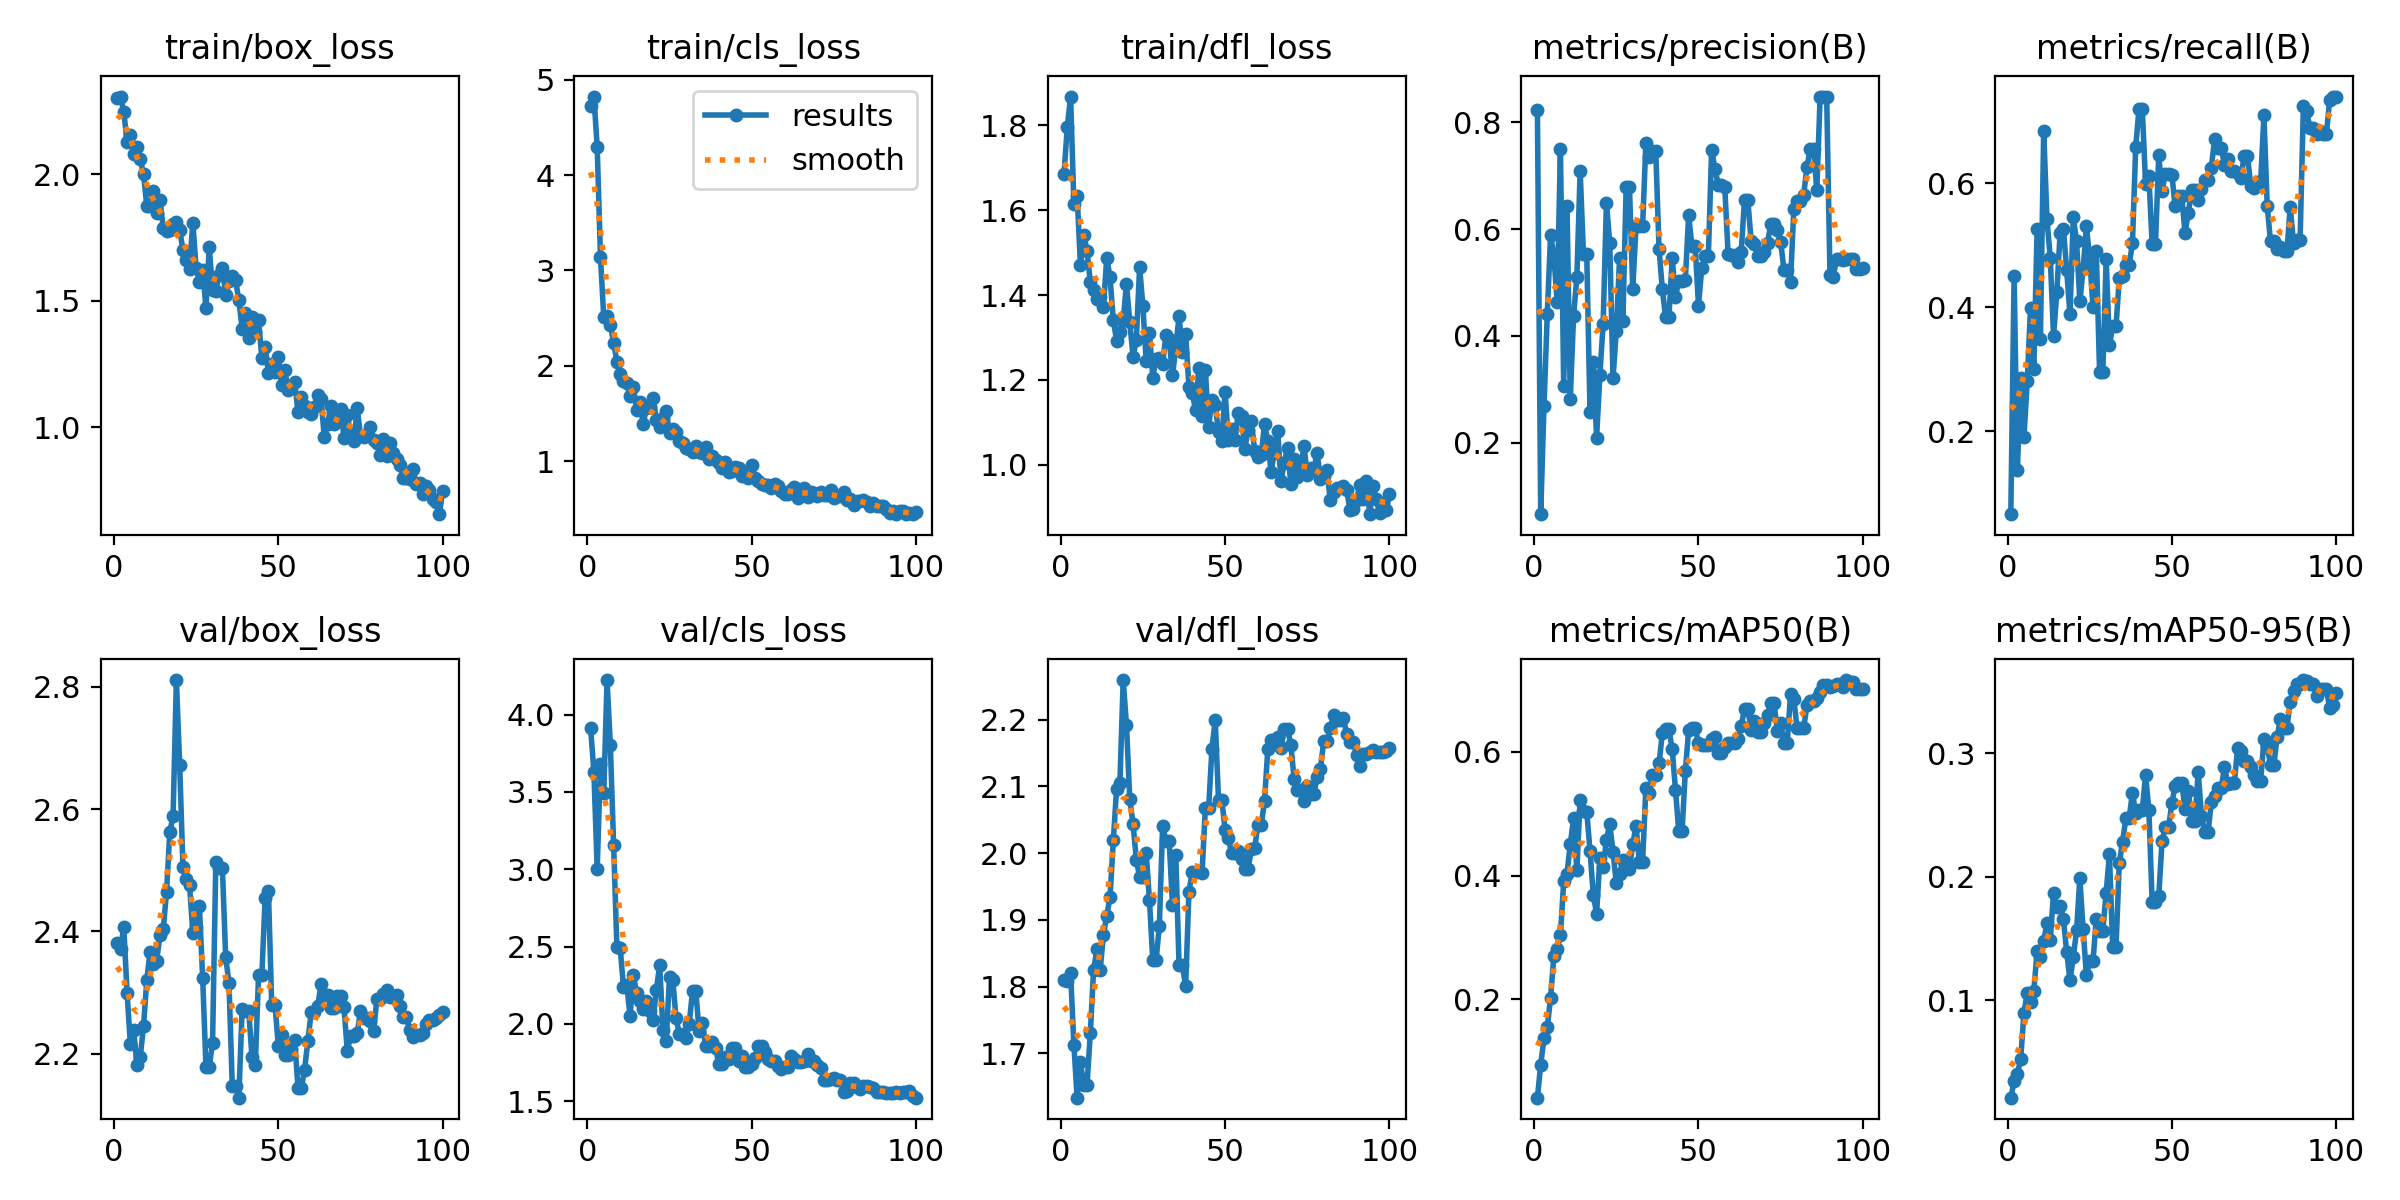

In [ ]:
Image("/content/runs/detect/train2/results.png", width=600)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,288,564 parameters, 0 gradients, 86.6 GFLOPs
val: Scanning /content/object-detection-ndian-vehicle-1/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100% 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.39it/s]
                   all         11         48      0.508      0.726      0.705      0.359
       2 wheeler bikes          6          6      0.664      0.667      0.778      0.364
       3 wheeler tempo          1          1      0.854          1      0.995      0.796
        3 wheeler toto          3          5       0.56        0.6      0.623      0.169
         4 axle trucks          3          3      0.458      0.584      0.597      0.319
             4 wheeler          6         10      0.465        0.7      0.364      0.102
      4 wheeler trucks         

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.15 source={dataset.location}/test/images save=True


Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,288,564 parameters, 0 gradients, 86.6 GFLOPs

image 1/6 /content/object-detection-ndian-vehicle-1/test/images/vedio_mp4-0002_jpg.rf.b9776b474ca8fc2b6c4b411b034427d0.jpg: 640x640 2 2 wheeler bikess, 1 4 wheeler, 1 5 axle trucks, 1 Cars, 50.2ms
image 2/6 /content/object-detection-ndian-vehicle-1/test/images/vedio_mp4-0008_jpg.rf.f6163a38c4b05e721969df7b8d12ed9c.jpg: 640x640 1 2 wheeler bikes, 1 4 axle trucks, 2 4 wheeler truckss, 40.7ms
image 3/6 /content/object-detection-ndian-vehicle-1/test/images/vedio_mp4-0023_jpg.rf.8b949c9b4e0672933f770e2fdf16ad34.jpg: 640x640 2 Carss, 40.6ms
image 4/6 /content/object-detection-ndian-vehicle-1/test/images/vedio_mp4-0036_jpg.rf.d14c55f2c0e9b20a5b3493d5c5cf04b8.jpg: 640x640 1 5 axle trucks, 1 6 axle trucks, 1 Cars, 39.2ms
image 5/6 /content/object-detection-ndian-vehicle-1/test/images/vedio_mp4-0037_jpg.rf.0e5ad3c75ce7cd88a637cea

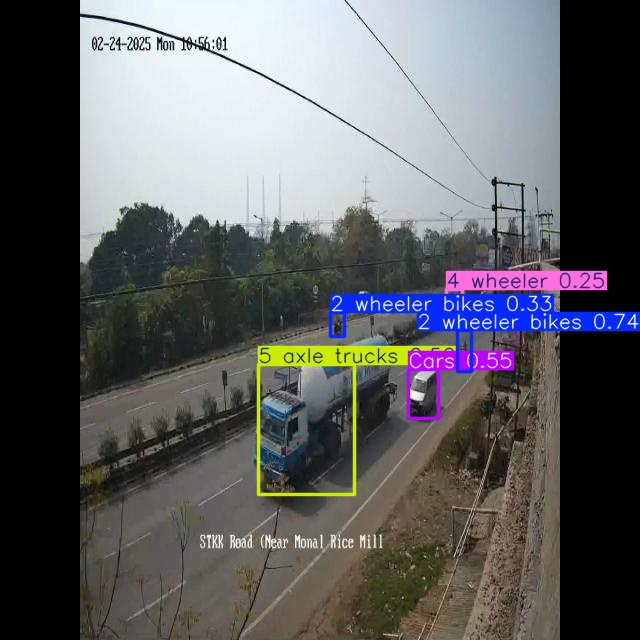

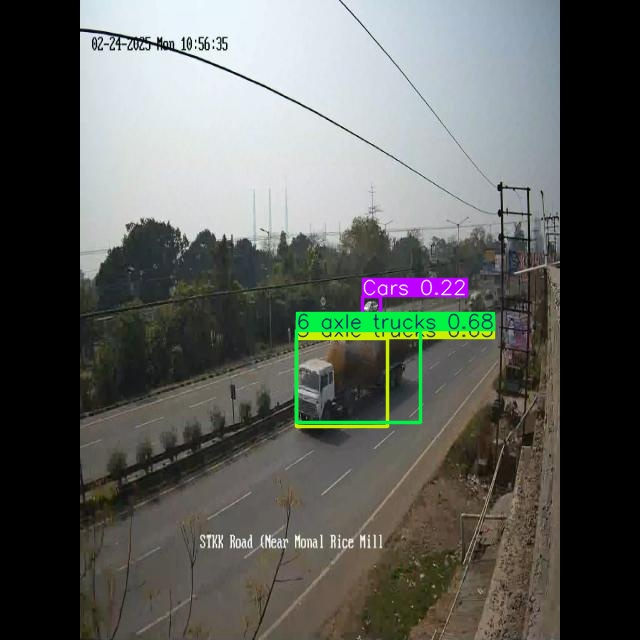

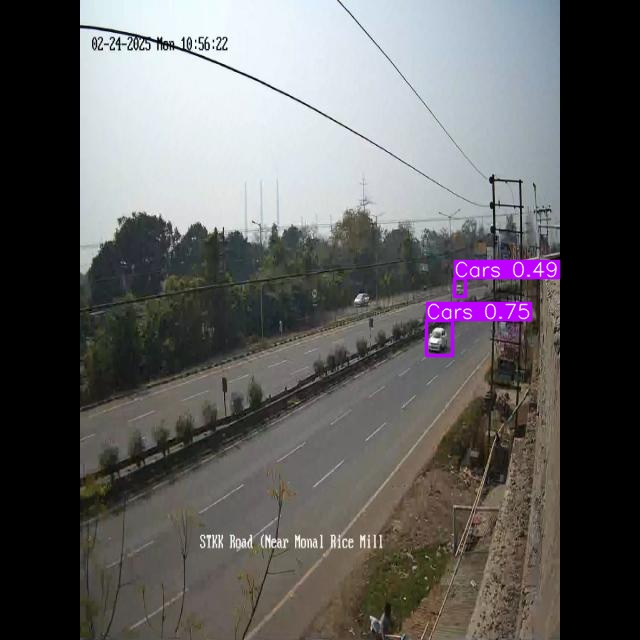

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!ls /content

object-detection-ndian-vehicle-1  runs	vedio.mp4  yolo11l.pt  yolo11n.pt  yolo11x.pt


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt source=/content/*.mp4

Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,288,564 parameters, 0 gradients, 86.6 GFLOPs

video 1/1 (frame 1/1802) /content/vedio.mp4: 384x640 2 4 axle truckss, 2 4 wheelers, 1 Cars, 76.0ms
video 1/1 (frame 2/1802) /content/vedio.mp4: 384x640 2 4 axle truckss, 2 4 wheelers, 1 5 axle trucks, 1 Cars, 31.0ms
video 1/1 (frame 3/1802) /content/vedio.mp4: 384x640 2 4 axle truckss, 2 4 wheelers, 1 5 axle trucks, 1 Cars, 31.0ms
video 1/1 (frame 4/1802) /content/vedio.mp4: 384x640 2 4 axle truckss, 2 4 wheelers, 1 5 axle trucks, 1 Cars, 31.0ms
video 1/1 (frame 5/1802) /content/vedio.mp4: 384x640 1 4 axle trucks, 2 4 wheelers, 1 5 axle trucks, 1 Cars, 27.4ms
video 1/1 (frame 6/1802) /content/vedio.mp4: 384x640 1 4 axle trucks, 2 4 wheelers, 1 5 axle trucks, 1 Cars, 26.9ms
video 1/1 (frame 7/1802) /content/vedio.mp4: 384x640 1 4 axle trucks, 2 4 wheelers, 1 5 axle trucks, 1 Cars, 26.9ms
video 1/1 (frame 8/1802) /conten

In [ ]:
import os


In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Replace with the actual path to your predicted video
video_path = 'runs/detect/predict2/video.mp4'

# Encode the video to base64
avi = open(video_path, 'rb').read()
data_url = "data:video/avi;base64," + b64encode(mp4).decode()

# Display the video
HTML(f"""
<video width=640 controls>
    <source src="{data_url}" type="video/avi">
</video>
""")

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/predict2/video.mp4'

In [ ]:
import os
os.listdir('runs/detect')

['train2', 'val', 'train', 'predict2', 'predict']

In [ ]:
os.listdir('runs/detect/predict2/')

['vedio.avi']

In [ ]:
!ffmpeg -i runs/detect/predict2//video.avi runs/detect/predict2//video.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from google.colab import files
files.download(video.avi)

NameError: name 'video' is not defined

In [ ]:
import cv2

video_path = '/content/runs/detect/predict2/vedio.avi'
cap = cv2.VideoCapture(video_path)
original_fps = cap.get(cv2.CAP_PROP_FPS)
cap.release()
print("Original FPS:", original_fps)

Original FPS: 30.0


In [ ]:
import cv2
import os

image_folder = '/content/runs/detect/predict2'
video_output = 'yolo_output.mp4'

# Get the original video's FPS
cap = cv2.VideoCapture('/content/runs/detect/predict2/vedio.avi')
fps = cap.get(cv2.CAP_PROP_FPS)
cap.release()
print("Using FPS:", fps)

# List all saved image frames and sort them
images = sorted([img for img in os.listdir(image_folder) if img.endswith(".jpg")])
if not images:
    raise Exception("No frames found in the detection output!")

# Read the first frame to get dimensions
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, _ = frame.shape

# Create the video writer with the original FPS
video = cv2.VideoWriter(video_output, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# Write each frame to the video file
for image in images:
    frame = cv2.imread(os.path.join(image_folder, image))
    video.write(frame)
video.release()

Using FPS: 30.0


Exception: No frames found in the detection output!